# Exam 2 Info

Exam 2 will be in class on Wednesday, Nov 15. You will have the entire class period (110 minutes) to complete the exam. Most of the questions on Exam 2 will require coding, though there might also be some more conceptual questions. You will complete and submit your work in a Colab notebook. **You will be required to use the desktop computers in the classroom for the exam.**



The exam is cumulative, with an emphasis on material from Day 10: Introduction to Text Data through Day 18: Estimating Test Metrics for Classification Models

Some of the questions on the exam might be deliberately ambiguous. I want to see how you take an ambiguous, real-world question and translate it into a concrete question that can be answered with data. For some problems, several answers might be acceptable, as long as you do a good job justifying your approach and answer. Just answer each question to the best of your ability according to _your_ interpretation of the question, and be clear about how you are interpreting the question.

You will need to know how to read in data sets from a file (e.g., `read_csv`). You will NOT be required to scrape data from webpages or APIs during the exam. However, I might give you data that I pulled from an API or webpage or you might need to use the documentation of the API or the source of the webpage.

## What is allowed during the exam

- You are allowed to use your own notes, electronic or hard copy, as long as they are your own original notes and not just copies of other sources.
- You are allowed to use all course content posted in Canvas without citation.
- You are allowed to use the internet and consult outside resources.  However, you must CITE any outside resources that you consult and include references.  Also, consulting is not copying.  Your can consult and cite references, but your work must be original. Moreover, copying material - including computer code - from outside sources is plagiarism.
- In particular, **if you consult any websites outside of Canvas or the course Colab notebooks, be sure to site those websites by providing the link.**

## What is NOT allowed during the exam

- You are NOT allowed to post questions to internet websites, such as (but not limited to) Chegg.com.
- You are NOT allowed to post questions from assignments to any AI, such as (but not limited to) ChatGPT or GPT-4.
- You are NOT allowed to copy material from outside sources.  Your can consult sources, but you must CITE any sources that you consult and include references.  Moreover, copying material - including computer code - from outside sources is plagiarism.
- You are NOT allowed to communicate with anyone during exams.
- You are NOT allowed to use any devices except for the desktop computers (unless you have DRC accommodations that you have discussed with me).

One example: you are allowed to use Google to find the documentation for a Pandas function to see what arguments are available, but you need to cite the websites you visit. You are NOT allowed to ask Google or AI or whatever to write the code for you.

**If you are not sure if something is allowed, ASK ME before doing it.**

## Prepaing for the Exam

You should start by reviewing the reading, in class notebooks, and assignments. Those items provide the most representative sample of the kinds of problems you will see on the exam.

There are also a few practice problems below. These are just a few examples of the kinds of problems you might see on the exam. This is NOT a representative sample of problems, and certainly NOT an exhaustive list of the kinds of problems you'll see on the exam. Do NOT study only the following problems.

## Problem

Your friends Walter and Anna are considering buying one of 2 homes. To determine the fair price of these 2 homes, Walter obtains a DataFrame, `df_housing`, consisting of data about 100 recently purchased homes in the area. He trains a linear regression model to predict the sale prices of these homes, using the features: square footage, number of bedrooms, number of bathrooms, and the house style - a categorical variable with 5 categories.

Here is Walter's code for fitting the model.

```
X_train = pd.get_dummies(df_housing[["sqft", "bed", "bath", "style"]])
y_train = df_housing["price"]
model = LinearRegression()
model.fit(X_train, y_train)
```


a) The data for the two homes that Walter is considering buying are stored in a different DataFrame, `df_new_homes`. Explain why the following code would not necessarily produce the correct predictions from the fitted
model above.

```
X_test = pd.get_dummies(df_new_homes[["sqft", "bed", "bath", "style"]])
model.predict(X_test)
```

**There might be a mismatch for the dummies for 'style' / the columns that it would result in causing an error.**

b) Walter trains his model using only the first 50 observations and evaluates the model based on the remaining 50 observations.

```
model.fit(X_train.iloc[:50], y_train.iloc[:50])
mean_squared_error(y_train.iloc[50:], model.predict(X_train.iloc[50:]))
```

Explain why and how Walter could improve his evaluation process. You should NOT write code; explain in words.

__One potential way to improve his evaluation process is to use a holdout set where Walter could split the data into a training set and holdout set. He would train on the training set and then evaluate on the holdout set. This would prevent overfitting.__

__Another way is to use validation where data is split into multiple folds. The model should be trained on some folds and then evaluated on the remaining fold. Repeating this process with different folds would allow for a more robust evaluation of the model.__ 

c) Anna fits a 2-nearest neighbors regression model to predict price from square footage, number of bedrooms, number of bathrooms, and the house style. You can assume that the model is fit correctly.

Suppose that the training data consists only of the following 5 houses.

| **price** | **sqft** | **bed** | **bath** |     **style** |
|----------:|---------:|--------:|---------:|--------------:|
|    700000 |     2000 |       3 |        2 | single family |
|    800000 |     2800 |       4 |      1.5 | single family |
|    500000 |     2000 |       3 |        2 |         condo |
|    550000 |     2000 |       3 |        3 |         condo |
|    600000 |     1800 |       3 |      1.5 | single family |

What price would this model predict for a 1500 square foot, 3 bedroom, 1.5 bathroom single family home? Provide a value and explain your reasoning.

__$650,000 which is the avg between the first entry and the last entry as those would be considered as the 2-nearest neighbors.__

d) Anna fits a $k$-nearest neighbors regression model to predict sales price, for different values of $k$, using the training data on the 100 houses in `df_housing`. Here is Anna's code; you can assume that appropriate steps are included in `...` below.

```
X_train = ...
y_train = ...

pipeline = (...,
            KNeighborsRegressor(n_neighbors = k))
pipeline.fit(X_train, y_train)
```

There are two code snippets below, (A) and (B). For each code snippet choose the curve (1, 2, 3, 4) in the plot below that the code snippet produces as Anna varies values of $k$. (Two curves will be left out.) Clearly identify your choices and explain your reasoning.

(A) `-cross_val_score(pipeline, X_train, y_train, cv = 10, scoring = neg_mean_squared_error).mean()`

(B) `((y_train - pipeline.predict(X_train)) ** 2).mean()`

<img src = 'https://drive.google.com/uc?id=1ZIhkTmJqFcby5OHzSIY8_tT1R5hEar2X'>

A ---> 4

B ---> 3

## Problem

This question involves the wines data set (https://dlsun.github.io/pods/data/wines.csv) which contains data about the chemical composition of various wines. We want to use $k$-nearest neighbors to predict the color (red or white) of a wine using the two features: **sulphates** and **alcohol**.

Find the value of $k$ between 1 and 20 that optimizes the average precision score.

In [20]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
df_wines = pd.read_csv('https://dlsun.github.io/pods/data/wines.csv')
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [22]:
X_train = df_wines[['sulphates', 'alcohol']]
y_train = df_wines['color']

pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [23]:
grid_search = GridSearchCV(pipeline,
                           param_grid={'kneighborsclassifier__n_neighbors': range(1, 20)},
                           scoring='precision_macro',
                           cv=10)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 20)},
             scoring='precision_macro')

In [24]:
grid_search.best_params_

{'kneighborsclassifier__n_neighbors': 15}

<Axes: xlabel='param_kneighborsclassifier__n_neighbors'>

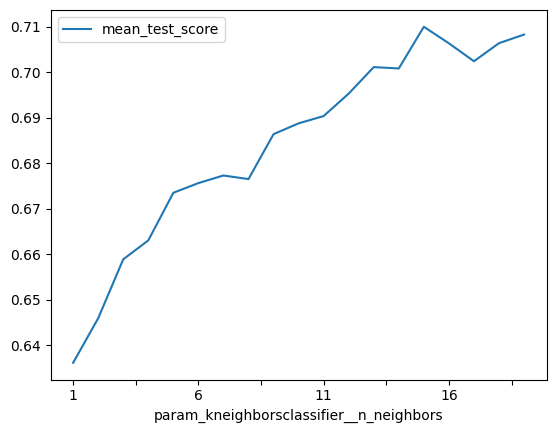

In [25]:
pd.DataFrame(grid_search.cv_results_).plot(x='param_kneighborsclassifier__n_neighbors',
                                           y='mean_test_score')

## Problem

The following two data sets contain data retrieved using the [Bing Maps API](https://docs.microsoft.com/en-us/bingmaps/rest-services/getting-started-with-the-bing-maps-rest-services).

- (1) A data set retrieved using the  [Traffic API](https://docs.microsoft.com/en-us/bingmaps/rest-services/traffic/) of traffic incidents in California (in `mapArea`, the bounding box for California is 32.534156, -124.409591, 42.009518, -114.131211.): http://users.csc.calpoly.edu/~dsun09/data301/traffic_incidents.csv. [This page](https://docs.microsoft.com/en-us/bingmaps/rest-services/traffic/traffic-incident-data) provides information about the fields that are returned by the Traffic API.

- (2) A subset of the data set consisting only of construction incidents, along with the elevation obtained using the [Elevations API](https://docs.microsoft.com/en-us/bingmaps/rest-services/elevations/get-elevations): http://users.csc.calpoly.edu/~dsun09/data301/construction_with_elevations.csv.


Using the construction incidents data set (2), you want to train a $5$-nearest neighbor model that predicts the **severity** of a construction incident. Consider two models, with the following features,

- (A) **description** and **roadClosed**
- (B) **description**, **roadClosed**, and **elevation**

Which of these two models would you prefer? Justify your choice with appropriate analysis.

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [27]:
df_construction = pd.read_csv('http://users.csc.calpoly.edu/~dsun09/data301/construction_with_elevations.csv')
df_construction.head()

,__type,description,end,incidentId,lastModified,roadClosed,severity,source,start,type,verified,point.type,point.coordinates,toPoint.type,toPoint.coordinates,elevation
0,TrafficIncident:http://schemas.microsoft.com/s...,At 4th St - Roadwork.,/Date(1583751326000)/,4439319157134259790,/Date(1583406000517)/,False,2,9,/Date(1583405731000)/,9,True,Point,"[34.05434, -118.25355]",Point,"[34.05279, -118.255]",100
1,TrafficIncident:http://schemas.microsoft.com/s...,At Lake St/Empire Ave - Roadwork.,/Date(1583699508000)/,1756561160417118801,/Date(1583369733763)/,False,2,9,/Date(1583353942000)/,9,True,Point,"[34.19208, -118.32929]",Point,"[34.19178, -118.32886]",238
2,TrafficIncident:http://schemas.microsoft.com/s...,At 6th Ave - Construction work.,/Date(1583699508000)/,2907481111744996361,/Date(1583369733763)/,False,3,9,/Date(1583353942000)/,9,True,Point,"[32.74833, -117.15953]",Point,"[32.75163, -117.15821]",47
3,TrafficIncident:http://schemas.microsoft.com/s...,At Sweetwater Creek - Maintenance work.,/Date(1583456460000)/,2364337417081418991,/Date(1583421866040)/,False,2,9,/Date(1583420460000)/,9,True,Point,"[37.60462, -119.96607]",Point,"[37.64227, -119.92548]",831
4,TrafficIncident:http://schemas.microsoft.com/s...,Between Maryland Pkwy and NV-582/Boulder Hwy -...,/Date(1583699508000)/,3981690120991033745,/Date(1583369733763)/,False,2,9,/Date(1583353942000)/,9,True,Point,"[36.10096, -115.13693]",Point,"[36.10091, -115.05077]",617


__Compare Elevation to Severity__

<Axes: xlabel='elevation', ylabel='severity'>

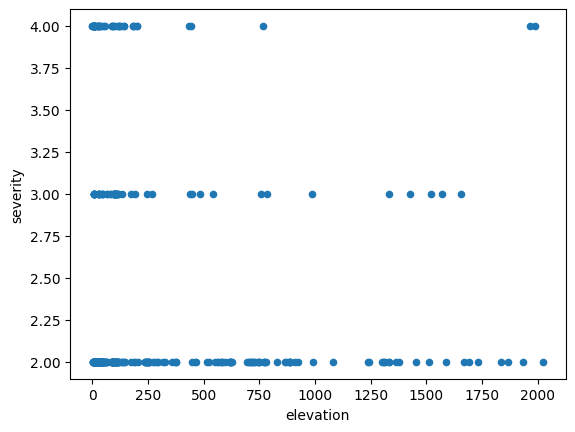

In [38]:
df_construction.plot.scatter(x='elevation', y='severity')

__Actual Code__

In [37]:
X_train = df_construction[['description', 'roadClosed']]
X_train['roadClosed'] = X_train['roadClosed'].astype(int)
y_train = df_construction['severity']
X_train.head()

/var/folders/k7/10_k144d7ld4n27r23xj0lym0000gn/T/ipykernel_2368/4183424113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['roadClosed'] = X_train['roadClosed'].astype(int)


,description,roadClosed
0,At 4th St - Roadwork.,0
1,At Lake St/Empire Ave - Roadwork.,0
2,At 6th Ave - Construction work.,0
3,At Sweetwater Creek - Maintenance work.,0
4,Between Maryland Pkwy and NV-582/Boulder Hwy -...,0


In [32]:
ct = make_column_transformer(
    (OneHotEncoder(), ["Description"]),
    remainder="passthrough"  # all other columns in X will be passed through unchanged
)
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['Description'])])

In [ ]:
pipeline = make_pipeline(
    ct,
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=5)
)

## Problem

Consider the OKCupid data set available at https://dlsun.github.io/pods/data/okcupid.csv, and the data documentation is [available here](https://github.com/rudeboybert/JSE_OkCupid/raw/master/okcupid_codebook.txt).

Study the profile of user 2855 in the data set, especially what they wrote in `essay9` about what they are looking for in a partner. Recommend five users in this data set that you think would be most compatible with this user.

__SRESHTA'S NOTE:__ *Also check out the Exam 1 as there is the same exact question there. However, we used a different approach to solve, so just compare this with that one. The approach below uses a **TF-IDF matrix** and **cosine similarities**, whereas, the approach in the Exam 1 practice just checks for key words and does a liner regression.*

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [39]:
ok_cupid = pd.read_csv('https://dlsun.github.io/pods/data/okcupid.csv')
ok_cupid.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,height,status
0,31,NaN,mostly vegetarian,socially,sometimes,graduated from college/university,"75% nice, 45% shy, 80% stubborn, 100% charming...",i'm a new nurse. it rules.,"multiple-choice questions, dancing.",it depends on the people.,...,"san francisco, california",might want kids,gay,likes cats,buddhism,f,taurus and it&rsquo;s fun to think about,no,67.0,single
1,25,average,NaN,socially,NaN,working on college/university,"i like trees, spending long periods of time co...","studying landscape horticulture, beekeeping, g...","wasting time, making breakfast, nesting",i have a lot of freckles,...,"oakland, california",NaN,gay,NaN,NaN,m,sagittarius and it&rsquo;s fun to think about,no,66.0,single
2,43,curvy,NaN,rarely,never,graduated from masters program,NaN,NaN,NaN,NaN,...,"san francisco, california",has a kid,straight,likes dogs and has cats,other and laughing about it,f,leo and it&rsquo;s fun to think about,trying to quit,65.0,single
3,31,average,NaN,socially,never,NaN,"i am a seeker of laughs ,music ,magick good pe...",i strive to live life to the fullest and to tr...,i am good at my magic and weaving a world of i...,i am guessing y'all would notice my jewelry an...,...,"san francisco, california",doesn&rsquo;t want kids,gay,NaN,other and very serious about it,m,capricorn and it&rsquo;s fun to think about,trying to quit,70.0,single
4,34,NaN,NaN,socially,NaN,graduated from ph.d program,i've just moved here from london after finishi...,i'm doing a postdoc in psychology at stanford,NaN,NaN,...,"san francisco, california",NaN,gay,NaN,NaN,m,cancer but it doesn&rsquo;t matter,NaN,71.0,single


In [41]:
ok_cupid.loc[2855, 'essay9']

'you are looking for a friend, i make a great one.<br />\nyou love chocolate, so do i.<br />\nyou enjoy intellectually stimulating conversation...'

In [51]:
essays = ok_cupid['essay0'].fillna('')
essays[2855] = ok_cupid.loc[2855, 'essay9']

In [55]:
vec = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", smooth_idf = False, norm=None)
vec.fit(essays)
tf_idf_sparse = vec.transform(essays)

pd.DataFrame(
    tf_idf_sparse.todense(),
    columns=vec.get_feature_names_out()
)


,0,00,000,01,01101000,01101001,03,06,07,08cm,...,zone,zones,zoo,zoolander,zubin,zumba,zurich,zydeco,zynga,zyrtec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
cos_sim = pd.DataFrame(cosine_similarity(tf_idf_sparse))[2855]
most_similar = cos_sim.sort_values(ascending=False)
most_similar[1:6]

1107    0.379910
1392    0.323154
316     0.278317
1076    0.278282
2519    0.270985
Name: 2855, dtype: float64